#### Linear Regression 구현
- 아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회
귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.</br>

• index_price: 물가지수</br>
• interest_rate: 이자율,</br>
• unemployment_rate: 실업률</br>

   year  month  interest_rate  unemployment_rate  index_price
0  2017     12           2.75                5.3         1464
1  2017     11           2.50                5.3         1394
2  2017     10           2.50                5.3         1357
3  2017      9           2.50                5.3         1293
4  2017      8           2.50                5.4         1256


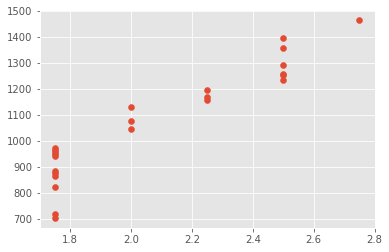

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'year':[2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'month':[12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'interest_rate':[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'unemployment_rate':[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'index_price':[1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)
print(df.head())

plt.style.use ('ggplot')
plt.scatter(df['interest_rate'], df['index_price'])

### 선형 회귀: 이자율과 물가지수 상관 관계 분석
- 물가지수와 이자율 산점도 및 선형 회귀 분석

In [223]:
import numpy as np
from sklearn.model_selection import train_test_split

interest_rate = np.array(df['interest_rate'])
index_price = np.array(df['index_price'])

train_input, test_input, train_target, test_target = train_test_split(
    interest_rate, index_price, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input =test_input.reshape(-1,	1)

print(train_input.shape, test_input.shape)

(18, 1) (6, 1)


In [224]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 기울기(a):	coef_,	절편(bias):	intercept_
print(lr.coef_, lr.intercept_)

0.8541859618501457
0.941892392945057
[574.45637584] -127.38255033557084


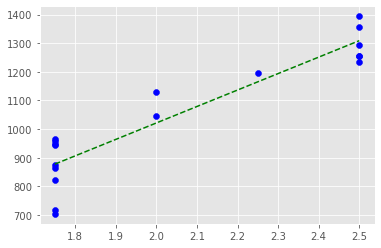

In [225]:
plt.scatter(train_input, train_target, color = 'blue')
plt.plot([1.75, 2.5], [1.75*lr.coef_ + lr.intercept_, 2.5*lr.coef_ + lr.intercept_],
        color = 'green', linestyle='--')
plt.show()

### 다항 회귀: 이자율과 물가지수 상관 관계 분석

In [226]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly =	np.column_stack((test_input**2,	test_input))

print(train_poly[0:5])
print(train_poly.shape,	test_poly.shape)

[[3.0625 1.75  ]
 [6.25   2.5   ]
 [3.0625 1.75  ]
 [6.25   2.5   ]
 [6.25   2.5   ]]
(18, 2) (6, 2)


In [227]:
# 선형 회귀 모델 재훈련
# • 제곱한 데이터를 이용하여 선형 회귀 모델을 다시 훈련
# • 타깃값은 그대로 사용함

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[-524.84946237 2802.42473118] -2429.1028225806517
0.8676269364555872
0.7945265214367343


[1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]


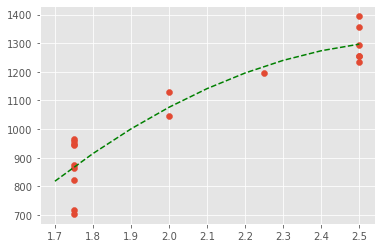

In [228]:
point=np.arange(1.7, 2.6, 0.1)
print(point)

plt.scatter(train_input, train_target)
plt.plot(point, -524.84946237*point**2 + 2802.42473118*point -2429.1028225806517,
color='green', linestyle='--')

### 선형 회귀: 실업률과 물가지수 상관 관계 분석
- 실업률과 물가지수 산점도 및 선형 회귀 분석

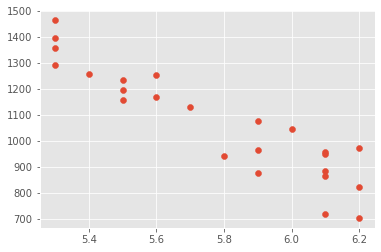

In [229]:
plt.scatter(df['unemployment_rate'], df['index_price'])

In [230]:
unemployment_rate = np.array(df['unemployment_rate'])
index_price = np.array(df['index_price'])

train_input, test_input, train_target, test_target = train_test_split(
    unemployment_rate, index_price, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(18, 1) (6, 1)


In [231]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 기울기(a):	coef_,	절편(bias):	intercept_
print(lr.coef_, lr.intercept_)

0.8748908875163574
0.707475113377226
[-611.41330166] 4586.05463182898


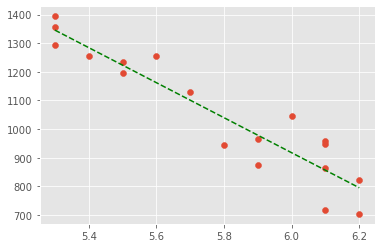

In [232]:
plt.scatter(train_input, train_target)
plt.plot([5.3, 6.2], [5.3*lr.coef_ + lr.intercept_, 6.2*lr.coef_ + lr.intercept_],
         color='green', linestyle='--')
plt.show()

### 다항 회귀: 실업률과 물가지수 상관 관계 분석

In [236]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly =	np.column_stack((test_input**2,	test_input))

print(train_poly[0:5])
print(train_poly.shape,	test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[[34.81  5.9 ]
 [28.09  5.3 ]
 [38.44  6.2 ]
 [31.36  5.6 ]
 [28.09  5.3 ]]
(18, 2) (6, 2)
[  -7.26428138 -527.97932022] 4347.248197109266
0.8748971920999006
0.7057073065929076


[5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]


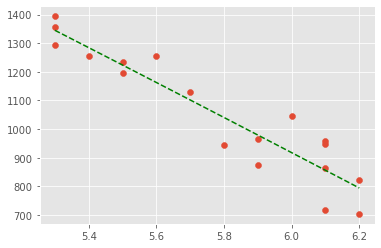

In [240]:
point=np.arange(5.3, 6.2, 0.1)
print(point)

plt.scatter(train_input, train_target)
plt.plot(point, -7.26428138*point**2 -527.97932022*point + 4347.248197109266,
color='green', linestyle='--')